In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Load raw dataset
dataset = np.zeros((1360,50,50,3))
for i in xrange(1360):
    img_filename = '17flowers_dataset/image_' + format(i+1, '04') + '.jpg'
    ################################################################################
    # TO DO: Sequentially 
    # 1. read images `img_filename`
    # 2. convert to float32 data type.
    # 3. Resize image to (50, 50)
    # 4. Store values in `dataset`
    ################################################################################
    pass
    img = cv2.imread(img_filename).astype(np.float32)/255.0
    res = cv2.resize(img,(50, 50))
    dataset[i] = res
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################

In [3]:
trainsetidx = np.load('17flowers_dataset/trainset.npy')
testsetidx  = np.load('17flowers_dataset/testset.npy')
labels      = np.load('17flowers_dataset/datalabel.npy')

################################################################################
# TO DO: 
# 1. Split `dataset` and `labels` into trainset and testset using the index
# provided in `trainsetidx` and `testsetidx`. 
# 2. Convert to row data.
# 3. Shuffle trainset to achieve a better classifier.
################################################################################
pass
X_train = np.reshape(dataset[trainsetidx], (trainsetidx.shape[0], -1)) 
y_train = labels[trainsetidx]
X_test = np.reshape(dataset[testsetidx], (testsetidx.shape[0], -1))
y_test = labels[testsetidx]
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print(X_train.shape, X_test.shape)

(1020, 10800) (340, 10800)


In [4]:
# trainsetidx = trainsetidx - 1

# testsetidx = np.squeeze(testsetidx[np.random.permutation(340)])
# np.save('17flowers_dataset/testset.npy', testsetidx)
# testsetidx = np.squeeze(testsetidx)
# np.save('Lab1/17flowers_dataset/testset.npy', testsetidx)
# idx = np.concatenate((trainsetidx, testsetidx), axis=0)
# print(np.unique(np.sort(idx)).shape)

In [5]:
from classifiers import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [6]:
# Open classifiers/k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# Test your implementation:
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(340, 1020)


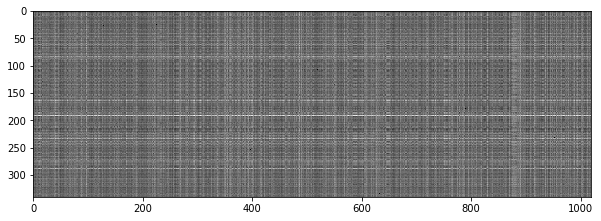

In [7]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples
plt.imshow(dists, interpolation='none')
plt.show()

In [8]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_test = y_test.shape[0]
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy*100))

Got 119 / 340 correct => accuracy: 35.000000


You should expect to see approximately `36%` accuracy. Now lets try out a larger `k`, say `k = 3`:

In [9]:
y_test_pred = classifier.predict_labels(dists, k=3)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy*100))

Got 107 / 340 correct => accuracy: 31.470588


You should expect to see a different performance.

In [10]:
# Now lets speed up distance matrix computation by using partial vectorization
# with one loop. Implement the function compute_distances_one_loop and run the
# code below:
dists_one = classifier.compute_distances_one_loop(X_test)
print(dists_one.shape)
# To ensure that our vectorized implementation is correct, we make sure that it
# agrees with the naive implementation. There are many ways to decide whether
# two matrices are similar; one of the simplest is the Frobenius norm. In case
# you haven't seen it before, the Frobenius norm of two matrices is the square
# root of the squared sum of differences of all elements; in other words, reshape
# the matrices into vectors and compute the Euclidean distance between them.
difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

(340, 1020)
Difference was: 0.000000
Good! The distance matrices are the same


In [11]:
# Now implement the fully vectorized version inside compute_distances_no_loops
# and run the code
dists_no = classifier.compute_distances_no_loops(X_test)
print(dists_no.shape)

# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_no, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

(340, 1020)
Difference was: 0.000000
Good! The distance matrices are the same


In [12]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

# you should see significantly faster performance with the fully vectorized implementation

Two loop version took 4.028947 seconds
One loop version took 11.535992 seconds
No loop version took 0.138216 seconds


### Cross-validation

We have implemented the k-Nearest Neighbor classifier but we set the value k = 3 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation.

In [13]:
num_folds = 6
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
pass
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {}
for k_value in k_choices:
    k_to_accuracies[k_value] = []

################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
pass
num_data_a_fold = X_train_folds[0].shape[0]
for f in xrange(0, num_folds):
    classifier = KNearestNeighbor()
    #Concatenate X_train_concat and y_train_concat
    X_train_concat = np.zeros((num_data_a_fold*(num_folds - 1), X_train_folds[0].shape[1]), X_train.dtype)
    y_train_concat = np.zeros((num_data_a_fold*(num_folds - 1)), y_train.dtype) 
    i = 0
    for fo in xrange(0, num_folds):
        if (fo != f):
#             print 'From: ', num_data_a_fold*i, ' to ', num_data_a_fold*(i + 1)
#             print y_train_concat[num_data_a_fold*i:num_data_a_fold*(i + 1)].shape
#             print y_train_folds[fo].shape
            X_train_concat[num_data_a_fold*i:num_data_a_fold*(i + 1)] = X_train_folds[fo].copy()
            y_train_concat[num_data_a_fold*i:num_data_a_fold*(i + 1)] = y_train_folds[fo].copy()
            i += 1
    
    classifier.train(X_train_concat, y_train_concat)
    val_dists = classifier.compute_distances_two_loops(X_train_folds[f])
#     print(dists)
    for k_value in k_choices:
        y_test_pred = classifier.predict_labels(val_dists, k_value)
        num_correct = np.sum(y_test_pred == y_train_folds[f])
        accuracy = float(num_correct) / y_test_pred.shape[0]
        print('k = %d, accuracy = %f' % (k_value, accuracy))
        k_to_accuracies[k_value] = np.append(k_to_accuracies[k_value], accuracy)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.294118
k = 3, accuracy = 0.235294
k = 5, accuracy = 0.276471
k = 8, accuracy = 0.317647
k = 10, accuracy = 0.282353
k = 12, accuracy = 0.229412
k = 15, accuracy = 0.258824
k = 20, accuracy = 0.252941
k = 50, accuracy = 0.282353
k = 100, accuracy = 0.288235
k = 1, accuracy = 0.217647
k = 3, accuracy = 0.217647
k = 5, accuracy = 0.247059
k = 8, accuracy = 0.247059
k = 10, accuracy = 0.252941
k = 12, accuracy = 0.264706
k = 15, accuracy = 0.223529
k = 20, accuracy = 0.252941
k = 50, accuracy = 0.235294
k = 100, accuracy = 0.211765
k = 1, accuracy = 0.282353
k = 3, accuracy = 0.247059
k = 5, accuracy = 0.300000
k = 8, accuracy = 0.300000
k = 10, accuracy = 0.317647
k = 12, accuracy = 0.300000
k = 15, accuracy = 0.311765
k = 20, accuracy = 0.323529
k = 50, accuracy = 0.329412
k = 100, accuracy = 0.217647
k = 1, accuracy = 0.276471
k = 3, accuracy = 0.211765
k = 5, accuracy = 0.211765
k = 8, accuracy = 0.217647
k = 10, accuracy = 0.211765
k = 12, accuracy = 0.229412
k = 1

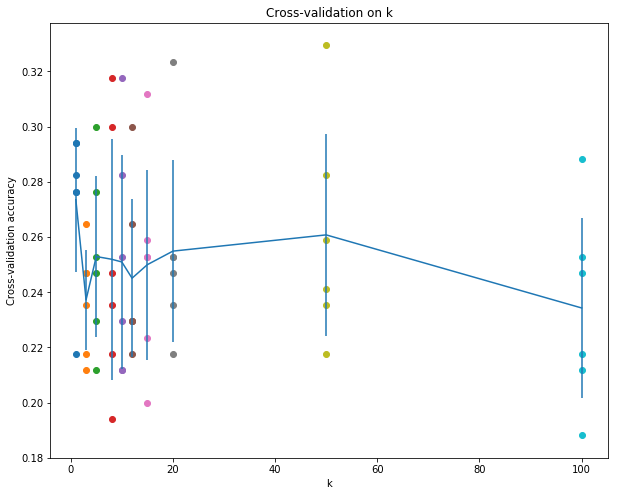

In [14]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [15]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 18% accuracy on the test data.
best_k = 1

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k, num_loops=2)

# Compute and display the accuracy
num_test = y_test.shape[0]
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy*100))

Got 119 / 340 correct => accuracy: 35.000000
